In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("1 Solar_weather.xlsx")

In [3]:
df.head()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
0,2017-01-01 00:00:00,0,0,1.6,0,100,450
1,2017-01-01 00:15:00,0,0,1.6,0,100,450
2,2017-01-01 00:30:00,0,0,1.6,0,100,450
3,2017-01-01 00:45:00,0,0,1.6,0,100,450
4,2017-01-01 01:00:00,0,0,1.7,0,100,450


In [4]:
df.tail()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
196772,2022-08-31 16:45:00,118,23.7,18.6,0,52,825
196773,2022-08-31 17:00:00,82,15.6,18.5,0,60,825
196774,2022-08-31 17:15:00,51,8,18.5,0,60,825
196775,2022-08-31 17:30:00,24,2.1,18.5,0,60,825
196776,2022-08-31 17:45:00,0,0,18.5,0,60,825


In [5]:
df.describe()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
count,196777,196777,196777,196777.0,196777,196777,196777
unique,196769,4558,2279,504.0,313,106,40
top,NAN,0,0,4.8,0,100,1020
freq,8,100855,95046,1500.0,171805,49473,16416


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Time                        196777 non-null  object
 1   Energy Captured[Wh]         196777 non-null  object
 2   Sun Light Intensity (W/m2)  196777 non-null  object
 3   Temperature                 196777 non-null  object
 4   1 Hour Rain Fall            196777 non-null  object
 5   Cloud Coverage              196777 non-null  object
 6   Length of Day_Light         196777 non-null  object
dtypes: object(7)
memory usage: 10.5+ MB


In [7]:
df['Energy Captured[Wh]'] = pd.to_numeric(df['Energy Captured[Wh]'], errors='coerce')

In [8]:
cols_to_convert = ['Sun Light Intensity (W/m2)', 'Temperature', '1 Hour Rain Fall', 'Cloud Coverage', 'Length of Day_Light']

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [9]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

In [10]:
df.isna().sum()

Time                           8
Energy Captured[Wh]            4
Sun Light Intensity (W/m2)     7
Temperature                    6
1 Hour Rain Fall               4
Cloud Coverage                13
Length of Day_Light            5
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isna().sum()

Time                          0
Energy Captured[Wh]           0
Sun Light Intensity (W/m2)    0
Temperature                   0
1 Hour Rain Fall              0
Cloud Coverage                0
Length of Day_Light           0
dtype: int64

In [13]:
df.describe()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
count,196730,196730.000000,196730.000000,196730.000000,196730.000000,196730.000000,196730.00000
mean,2019-10-30 04:20:42.364154112,573.078712,32.603001,9.792552,0.066037,65.968586,748.70579
min,2017-01-01 00:00:00,-54.000000,0.000000,-16.600000,0.000000,-250.000000,450.00000
25%,2018-06-02 19:03:45,0.000000,0.000000,3.600000,0.000000,34.000000,570.00000
50%,2019-10-29 02:37:30,0.000000,1.600000,9.300000,0.000000,82.000000,765.00000
75%,2021-03-24 10:11:15,578.000000,46.800000,15.700000,0.000000,100.000000,930.00000
max,2022-08-31 17:45:00,5020.000000,270.000000,35.800000,8.090000,101.000000,1020.00000
std,NaN,1044.871534,52.178241,7.994936,0.278917,36.638523,194.84763


In [14]:
import numpy as np

In [15]:
less_than_zero_energy = df["Energy Captured[Wh]"][df["Energy Captured[Wh]"] < 0]

In [16]:
len(less_than_zero_energy)

1

In [17]:
df = df[df["Energy Captured[Wh]"] >=0]


In [18]:
less_than_zero_cloud = df["Cloud Coverage"][df["Cloud Coverage"] < 0]

In [19]:
len(less_than_zero_cloud)

2

In [20]:
df = df[df["Cloud Coverage"] >=0]


In [21]:
df.describe()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
count,196727,196727.000000,196727.000000,196727.000000,196727.000000,196727.000000,196727.000000
mean,2019-10-30 04:43:21.210306304,573.087726,32.603463,9.792664,0.066037,65.970863,748.710345
min,2017-01-01 00:00:00,0.000000,0.000000,-16.600000,0.000000,0.000000,450.000000
25%,2018-06-02 19:37:30,0.000000,0.000000,3.600000,0.000000,34.000000,570.000000
50%,2019-10-29 03:00:00,0.000000,1.600000,9.300000,0.000000,82.000000,765.000000
75%,2021-03-24 10:22:30,578.000000,46.800000,15.700000,0.000000,100.000000,930.000000
max,2022-08-31 17:45:00,5020.000000,270.000000,35.800000,8.090000,101.000000,1020.000000
std,NaN,1044.876946,52.178503,7.994945,0.278919,36.629884,194.845624


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196727 entries, 0 to 196776
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Time                        196727 non-null  datetime64[ns]
 1   Energy Captured[Wh]         196727 non-null  float64       
 2   Sun Light Intensity (W/m2)  196727 non-null  float64       
 3   Temperature                 196727 non-null  float64       
 4   1 Hour Rain Fall            196727 non-null  float64       
 5   Cloud Coverage              196727 non-null  float64       
 6   Length of Day_Light         196727 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 12.0 MB


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

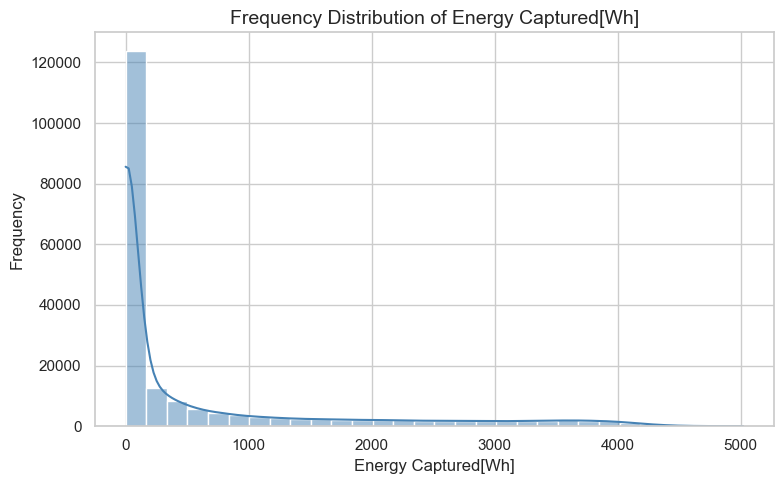

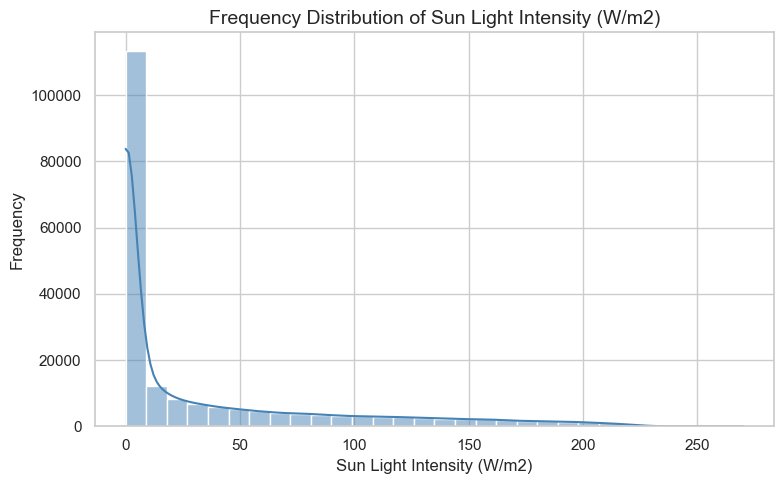

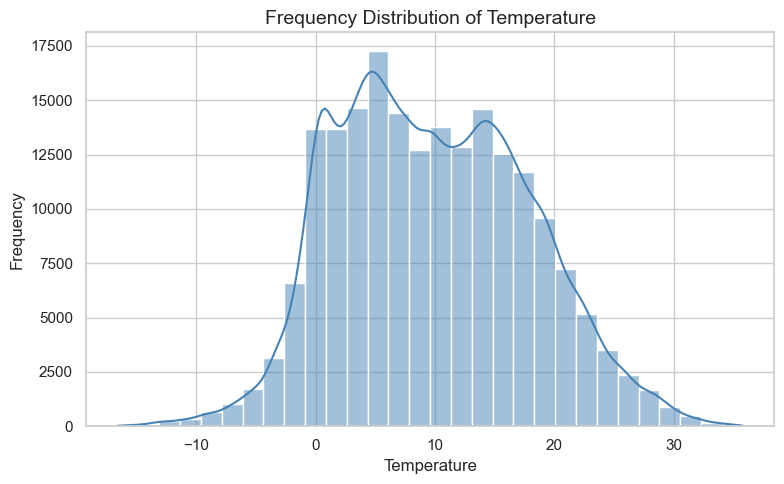

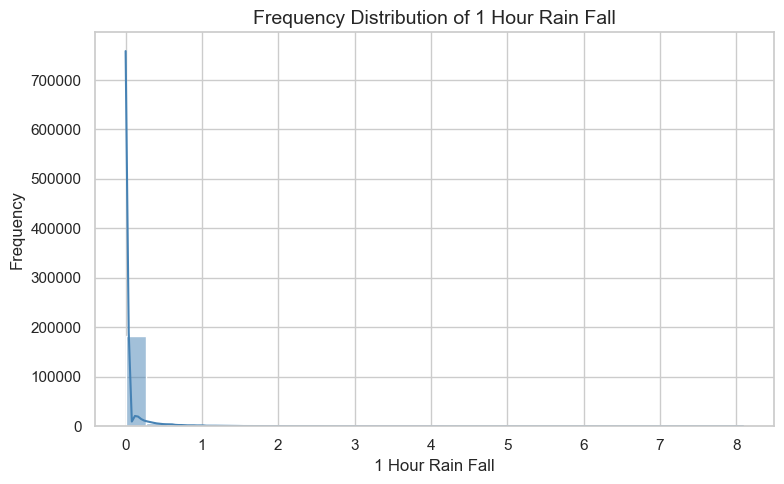

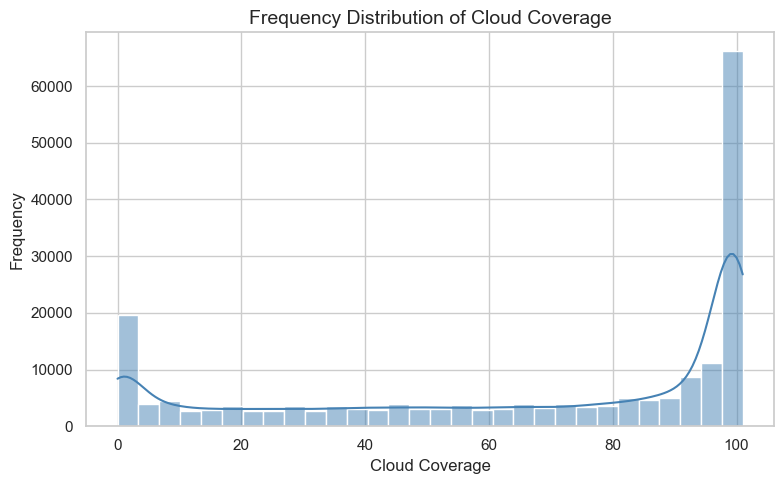

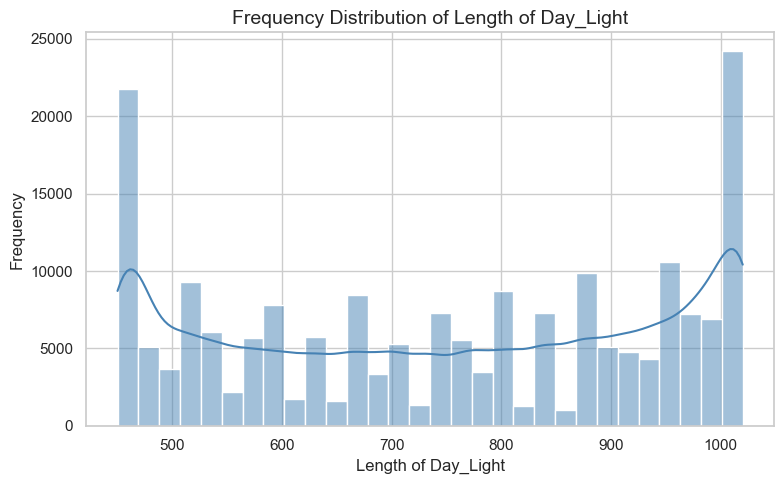

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv("your_file.csv")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.set(style="whitegrid")

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Frequency Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


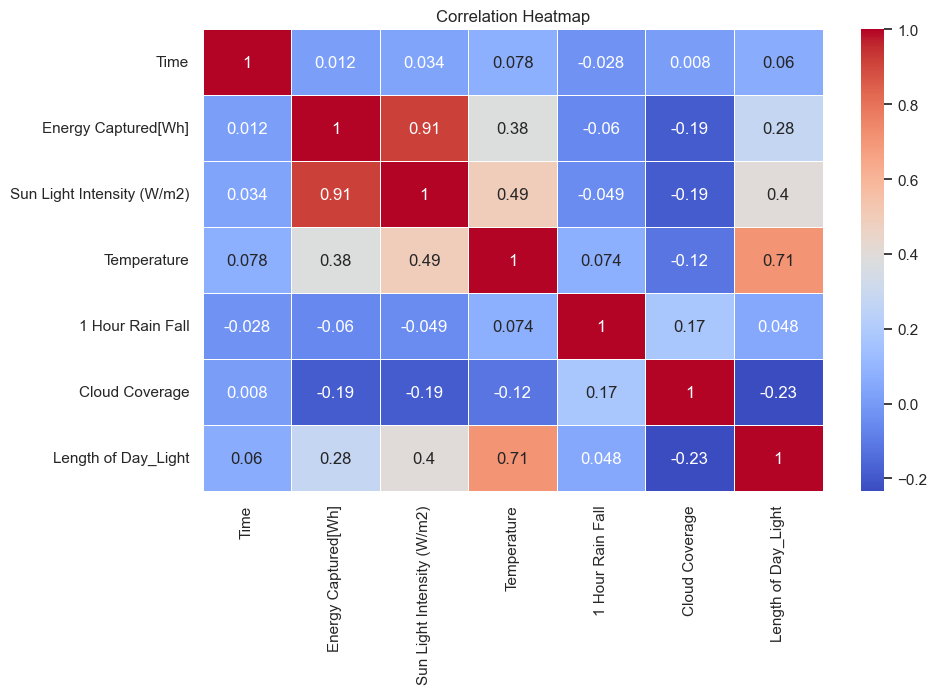


Correlation with target variable:
Energy Captured[Wh]           1.000000
Sun Light Intensity (W/m2)    0.914580
Temperature                   0.378549
Length of Day_Light           0.280644
Time                          0.012146
1 Hour Rain Fall             -0.059882
Cloud Coverage               -0.190206
Name: Energy Captured[Wh], dtype: float64


In [25]:
#  correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Print correlations with the target variable
target = "Energy Captured[Wh]"
print("\nCorrelation with target variable:")
print(corr[target].sort_values(ascending=False))


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [27]:
# Features and target
X = df[['Sun Light Intensity (W/m2)', 'Temperature', '1 Hour Rain Fall',
        'Cloud Coverage', 'Length of Day_Light']]
y = df['Energy Captured[Wh]']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)

r2, mae, mse


(0.8456789125646414, 238.69870733926174, 164349.89059939128)

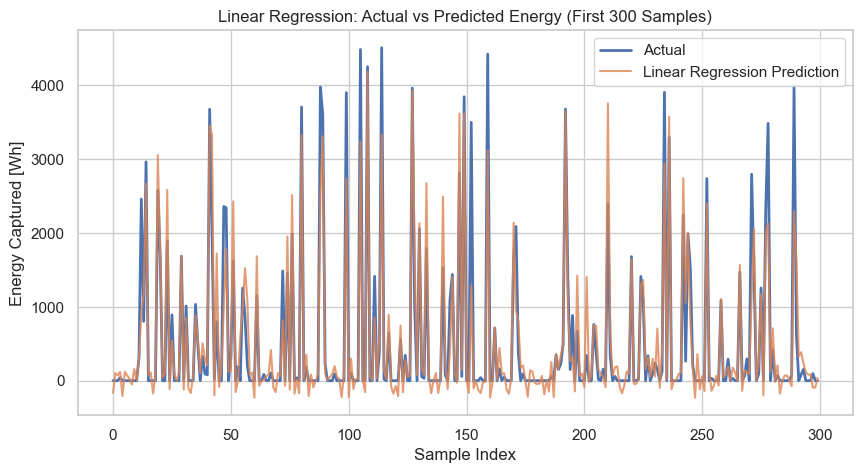

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:300], label="Actual", linewidth=2)
plt.plot(y_pred_lr[:300], label="Linear Regression Prediction", alpha=0.8)
plt.title("Linear Regression: Actual vs Predicted Energy (First 300 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Energy Captured [Wh]")
plt.legend()
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Features and target
X = df[['Sun Light Intensity (W/m2)', 'Temperature', '1 Hour Rain Fall',
        'Cloud Coverage', 'Length of Day_Light']]
y = df['Energy Captured[Wh]']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)

r2, mae, mse

(0.9151760972718439, 130.1586741443586, 90336.31997587715)

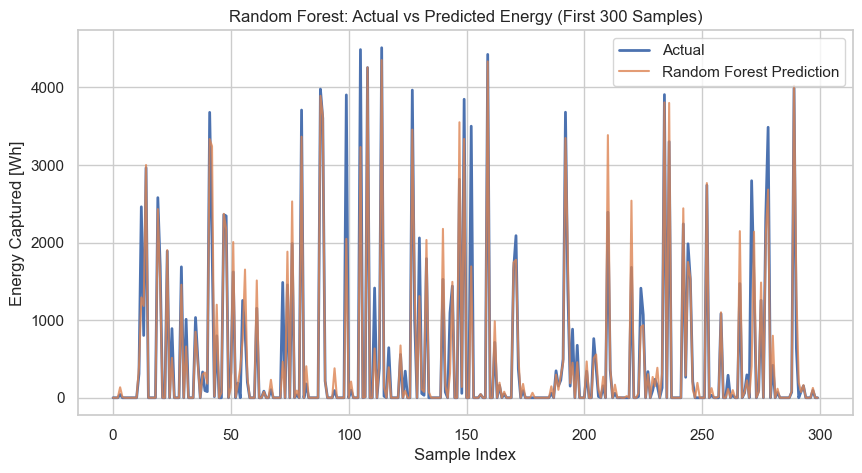

In [30]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:300], label="Actual", linewidth=2)
plt.plot(y_pred_rf[:300], label="Random Forest Prediction", alpha=0.8)
plt.title("Random Forest: Actual vs Predicted Energy (First 300 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Energy Captured [Wh]")
plt.legend()
plt.show()

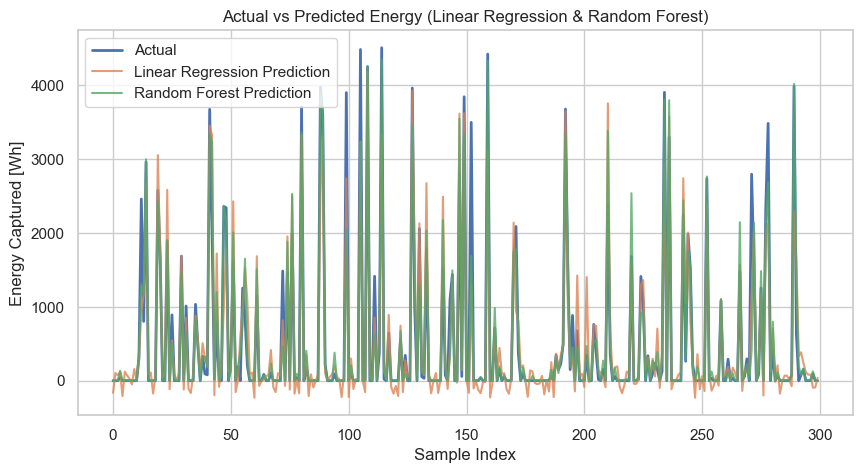

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Actual values
plt.plot(y_test.values[:300], label="Actual", linewidth=2)

# Linear Regression predictions
plt.plot(y_pred_lr[:300], label="Linear Regression Prediction", alpha=0.8)

# Random Forest predictions
plt.plot(y_pred_rf[:300], label="Random Forest Prediction", alpha=0.8)

plt.title("Actual vs Predicted Energy (Linear Regression & Random Forest)")
plt.xlabel("Sample Index")
plt.ylabel("Energy Captured [Wh]")
plt.legend()
plt.show()

In [32]:
df[df['Time'].dt.month == 1].groupby(df['Time'].dt.year)['Energy Captured[Wh]'].sum()

Time
2017    442000.0
2018    372836.0
2019    348933.0
2020    364403.0
2021    247506.0
2022    417678.0
Name: Energy Captured[Wh], dtype: float64

In [33]:
import pandas as pd

future_time = pd.Timestamp("2026-01-10 12:30")

# Extract historical rows from the same month & time
hist = df[
    (df['Time'].dt.month == future_time.month) &
    (df['Time'].dt.time == future_time.time())
]

# Take the mean of historical features for that time
X_future = hist[['Sun Light Intensity (W/m2)', 'Temperature',
                 '1 Hour Rain Fall', 'Cloud Coverage',
                 'Length of Day_Light']].mean().to_frame().T

# Predict energy
y_future = rf.predict(X_future)

print("Predicted Energy Captured [Wh]:", y_future[0])


Predicted Energy Captured [Wh]: 247.92
